### Project Idea 2:
- A good loan (from the prospective of an investor) pays 
the interests and fractional principals on time and terminate at loan maturity.
- An investor often lose money when a loan goes into default, settlement,
or 'written off' (called **charged off** in this data set).
- Build a supervised model to make **multi-label** prediction on 3 dimensions
"charged off + default", "settlement involved", "hardship".
- This can be used either by **Lending Club** itself or a third-party investing firm
for loan-grade design or accurated portfolio selection.
- Depending on the scope of your project, you may 
    - tackle a single label prediction.
    - restrict to the pooled models.
    - focus on the time seris models
- This is a **multi-label** binary imbalance classification task.
- If you train a **pooled** model, you have to deal with $2M+$ samples, often too
large for a typical ML algorithm to handle.

- Try several imbalance classification techniques and evaluate their performance.

- Based on your business, discuss the negative impacts of type I (false
positive), type II (false negative) errors in your prediction.

- If you decide to train a time series model, make sure that you have some
basic background on performing hyper-parameter tuning in the time series context.

- **MUST**: A defaulted loan with a loan amount $\$1000$ has a totally different 
impact to the final profit than a defaulted $\$50000$ loan. 
   - Discuss whether the **classroom-taught** machine learning techniques 
    addresses these issues. How would you modify the classifier to take into account 
         - your business objectives.
         - the profit and loss focus.

- Can you use **NLP** technique to extract insights on the loan descriptions
which helps your predictive task?
    
    
    

- Are there poor performing approved loans which should be rejected?
- What is the business impact (pros and cons) of rejecting such non-performing loans?


    

</a><br>
# Structure: 
- <a href="#preprocessing">Preprocessing</a><br>
- <a href="#ml">Machine Learning</a><br>
    - Unsupervised Machine Learning  
        - <a href="#kmeans">K Means</a><br> 

    - Supervised Machine Learning      
        - <a href="#decision">Decision Tree</a><br>
        - <a href="#rf">Random Forest</a><br>
        - <a href="#svm">SVM</a><br>
        - <a href="#xgboost">XGBoost</a><br>
        - <a href="#logistic">Logistic Regression</a><br>
        - <a href="#naive">Naive Bayes Classifier</a><br>
        - <a href="#neighbor">Nearest Neighbor</a><br>
            


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
from sklearn import preprocessing

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)


In [84]:
accepted_raw=pd.read_csv('accepted_2007_to_2018Q4.csv.gz')

C:\Users\Laptop2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
accepted_raw.tax_liens.unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., 10.,  7.,  6.,  9.,  8., 22., 12.,
       11., 25., 17., 15., 13., 27., 85., 21., 18., 16., 46., 14., nan,
       52., 19., 29., 44., 30., 45., 20., 37., 39., 63., 34., 28., 61.,
       48., 53., 23., 24.])

In [12]:
accepted_raw.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [85]:
sample=accepted_raw.sample(3000)

In [71]:
accepted_raw.debt_settlement_flag.unique()

array(['N', 'Y', nan], dtype=object)

In [99]:
accepted_raw.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [93]:
accepted_raw[accepted_raw.loan_status.isin(['Charged Off']) ].debt_settlement_flag

13         N
25         N
30         N
31         N
33         N
41         N
60         N
63         N
65         N
68         Y
78         N
79         N
83         N
84         N
99         Y
102        N
105        Y
118        N
128        N
132        N
143        Y
144        Y
146        N
149        N
152        Y
158        N
160        N
171        N
174        N
177        N
181        N
184        Y
205        N
217        Y
218        N
231        N
237        N
246        N
247        N
248        N
249        N
276        N
277        N
291        N
297        N
308        N
312        N
320        N
321        Y
331        N
335        N
342        N
350        N
355        N
358        N
360        N
361        N
365        N
370        N
377        N
382        N
383        N
384        N
393        N
419        N
427        N
436        N
442        N
443        Y
449        N
456        N
476        N
489        N
502        N
505        N
507        N
508        N

In [400]:
accepted_raw.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [413]:
import numpy as np
from sklearn.impute import SimpleImputer

def data_processing(data, one_hot_encoder=False,Label_encoder=False):

    data=data.copy()
    
  
    #Create target variable column with 3 lables: "charged off + default", "settlement involved", "hardship"
    data['class_charged off_default']=[1 if ele in ['Charged Off','Default'] else 0 for ele in data['loan_status']]
    data['class_settlement_involved']=[1 if ]
    
    #Drop rows with missing information in issue_d.
#     row_to_drop=data[data.issue_d.isna()].index.tolist()
#     data=data.drop(data.index[row_to_drop])
    
    #drop irrevalent
    drop_list=['id','member_id',"funded_amnt","funded_amnt_inv",'desc','title','issue_d',
              'installment','pymnt_plan','zip_code','emp_title',
              'url','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','policy_code',
              "total_pymnt","total_pymnt_inv",'total_rec_prncp','initial_list_status','out_prncp',
              'out_prncp_inv','total_rec_int','total_rec_late_fee',
              'recoveries','collection_recovery_fee','last_fico_range_high','last_fico_range_low']

    data=data.drop(drop_list,axis=1)
      
    
    #I think term should be categorical, not numerical
    #data['term'] = data.term.apply(lambda x: x.split()[0])

    data['emp_length'] = data['emp_length'].str.extract('(\d+)')
    data.emp_length = data.emp_length.fillna(0)
    
    ''' when annual_inc is missing, 
    employment title is missing too. 
    However, these loans are marked s grade A. 
    fill 0 for now
    '''

           
    # Drop rows with an insignificant amount of number of missing values
    #acc_now_delinq should not be dropped
    drop_rows = list(data[['loan_amnt','annual_inc','earliest_cr_line','delinq_2yrs',
                      'earliest_cr_line','inq_last_6mths']])

    for drop_row in drop_rows:
        data = data.dropna(axis=0, subset=[drop_row])
    
    data.dti = data.dti.fillna(data.revol_bal / data.annual_inc)
        
    # Time between earliest credit line and last credit pull

    data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
    data['last_credit_pull_d']=pd.to_datetime(data['earliest_cr_line'])
    data['cr_line_months'] = ((data['last_credit_pull_d'] - data['earliest_cr_line'])/np.timedelta64(1, 'M'))
    data['cr_line_months'] = data['cr_line_months'].astype(int)
    data=data.drop(['earliest_cr_line'], axis=1)
        
    #Missing value
    data.inq_last_6mths=data.inq_last_6mths.fillna(0)
    data.mths_since_last_record = data.mths_since_last_record.fillna(0)
    data.mths_since_last_delinq = data.mths_since_last_delinq.fillna(0)
    data.open_acc=data.open_acc.fillna(0)
    data.revol_util=data.revol_util.fillna(0)
    
    #collections_12_mths_ex_med
    data.collections_12_mths_ex_med=data.collections_12_mths_ex_med.fillna(0)
    data.mths_since_last_major_derog=data.mths_since_last_major_derog.fillna(0)
    
    
    #annual income should not be dropped, fill with -999
    data.annual_inc_joint=data.annual_inc_joint.fillna(0)
    
    #dti_join should not be dropped
    data.dti_joint=data.dti_joint.fillna(0)
    
    #Missing value
    data.verification_status_joint=data.verification_status_joint.fillna('None')
    
    #Missing value
    data.tot_coll_amt=data.tot_coll_amt.fillna(0)
    data.tot_cur_bal=data.tot_cur_bal.fillna(0)
    data.open_acc_6m=data.open_acc_6m.fillna(0)
    data.open_act_il=data.open_act_il.fillna(0)
    data.open_il_12m=data.open_il_12m.fillna(0)
    data.open_il_24m=data.open_il_24m.fillna(0)
    data.mths_since_rcnt_il =data.mths_since_rcnt_il.fillna(0)
    data.total_bal_il=data.total_bal_il.fillna(0)
    data.il_util=data.il_util.fillna(0)
    data.open_rv_12m=data.open_rv_12m.fillna(0)
    data.open_rv_24m=data.open_rv_24m.fillna(0)
    data.max_bal_bc=data.max_bal_bc.fillna(0)
    data.all_util=data.all_util.fillna(0)
    data.total_rev_hi_lim=data.total_rev_hi_lim.fillna(0)
    

# inq_fi  
# : [ 3.  0.  2.  1.  5.  4.  6.  8. 16.  7.  9. 10. 13. 11. 17. 12. 14. nan
#  15. 18. 21. 19. 22. 38. 20. 32. 23. 27. 28. 24. 29. 31. 25. 48.] 866162
    data.inq_fi=data.inq_fi.fillna(0)
    
# total_cu_tl  
# : [  1.   0.   5.   2.   3.   4.   6.   8.   9.   7.  13.  12.  10.  11.
#   14.  18.  16.  17.  15.  19.  24.  21.  22.  28.  23.  20.  nan  29.
#   30.  33.  27.  25.  35.  32.  26.  31.  52.  39.  34.  40.  38.  36.
#   46.  37. 111.  54.  44.  49.  45.  42.  68.  51.  71.  43.  77.  60.
#   47.  79.  41.  48.  56.  55.  65.] 866163
    data.total_cu_tl=data.total_cu_tl.fillna(0)
    
# inq_last_12m  
# : [ 4.  6.  1.  0.  3.  2.  5.  9.  7.  8. 10. 12. 14. 16. 13. 20. 11. 15.
#  19. 18. 26. 21. 17. 30. 25. nan 22. 32. 24. 27. 23. 33. 31. 39. 45. 46.
#  29. 40. 35. 41. 49. 38. 36. 28. 34. 51. 67. 42. 37.] 866163
    data["inq_last_12m"]=data["inq_last_12m"].apply(lambda x: float(x))
    data["inq_last_12m"]=data["inq_last_12m"].fillna(0)
    
# acc_open_past_24mths  
# : [ 4.  6.  2. 10.  0.  7.  5.  9.  3.  1. 17. 13. 12.  8. 11. 14. 19. 24.
#  18. 15. 16. 25. 31. 32. 20. 22. 21. 23. 26. 50. 40. 29. 64. 27. 35. 34.
#  47. 28. 39. 33. 36. 41. 38. 48. 30. 42. 37. nan 46. 54. 49. 56. 45. 43.
#  53. 44. 55. 61.] 50063
    data.acc_open_past_24mths=data.acc_open_past_24mths.fillna(0)
    
# avg_cur_bal  
# : [20701.  9733. 31617. ... 79516. 85158. 72812.] 70379
    data.avg_cur_bal=data.avg_cur_bal.fillna(0)
    
# bc_open_to_buy  
# : [ 1506. 57830.  2737. ... 79096. 50160. 73489.] 74968
    data.bc_open_to_buy=data.bc_open_to_buy.fillna(0)


# bc_util  
# : [ 37.2  27.1  55.9 ... 162.  194.9 193. ] 76104
    data.bc_util=data.bc_util.fillna(0)
    
    #drop irrevalent columns
    columns_to_drop=['chargeoff_within_12_mths','delinq_amnt']
    
    data=data.drop(columns_to_drop, axis=1)

    data.mo_sin_old_il_acct=data.mo_sin_old_il_acct.fillna(0)
    data.mo_sin_old_rev_tl_op =data.mo_sin_old_rev_tl_op .fillna(0)
    data.mo_sin_rcnt_rev_tl_op=data.mo_sin_rcnt_rev_tl_op.fillna(0)
    data.mo_sin_rcnt_tl=data.mo_sin_rcnt_tl.fillna(0)
    data.mort_acc=data.mort_acc.fillna(0)
    data.mths_since_recent_bc=data.mths_since_recent_bc.fillna(0)
    data.mths_since_recent_bc_dlq=data.mths_since_recent_bc_dlq.fillna(0)
    data.mths_since_recent_inq=data.mths_since_recent_inq.fillna(0)
    data.mths_since_recent_revol_delinq=data.mths_since_recent_revol_delinq.fillna(0)
    data.num_accts_ever_120_pd=data.num_accts_ever_120_pd.fillna(0)
    data.num_actv_bc_tl=data.num_actv_bc_tl.fillna(0)
    data.num_actv_rev_tl=data.num_actv_rev_tl.fillna(0)
    data.num_bc_sats=data.num_bc_sats.fillna(0)
    data.num_bc_tl=data.num_bc_tl.fillna(0)
    data.num_il_tl=data.num_il_tl.fillna(0)
    data.num_op_rev_tl=data.num_op_rev_tl.fillna(0)
    data.num_rev_accts=data.num_rev_accts.fillna(0)
    data.num_rev_tl_bal_gt_0=data.num_rev_tl_bal_gt_0.fillna(0)
    data.num_sats=data.num_sats.fillna(0)
    data.num_tl_120dpd_2m=data.num_tl_120dpd_2m.fillna(0)
    data.num_tl_30dpd=data.num_tl_30dpd.fillna(0)
    data.num_tl_90g_dpd_24m=data.num_tl_90g_dpd_24m.fillna(0)
    data.num_tl_op_past_12m=data.num_tl_op_past_12m.fillna(0)
    data.pct_tl_nvr_dlq=data.pct_tl_nvr_dlq.fillna(0)
    data.percent_bc_gt_75=data.percent_bc_gt_75.fillna(0)
    data.pub_rec_bankruptcies=data.pub_rec_bankruptcies.fillna(0)
    data.tax_liens=data.tax_liens.fillna(0)
    data.tot_hi_cred_lim=data.tot_hi_cred_lim.fillna(0)
    data.total_bal_ex_mort=data.total_bal_ex_mort.fillna(0)
    data.total_bc_limit=data.total_bc_limit.fillna(0)
    data.total_il_high_credit_limit=data.total_il_high_credit_limit.fillna(0)
    data.revol_bal_joint=data.revol_bal_joint.fillna(0)

    
    
    column_secondary_applicant=['sec_app_fico_range_low','sec_app_fico_range_high',
                               "sec_app_earliest_cr_line",'sec_app_inq_last_6mths',
                               'sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util',
                               'sec_app_open_act_il',"sec_app_num_rev_accts",'sec_app_chargeoff_within_12_mths',
                               'sec_app_collections_12_mths_ex_med',"sec_app_mths_since_last_major_derog",
                               ]

    for column in column_secondary_applicant:
        data[column]=data[column].fillna(0)
    

    #Drop Columns after loan issued
    columns_after_loan_issued=['hardship_flag',
     'hardship_type',
     'hardship_reason',
     'hardship_status',
     'deferral_term',
     'hardship_amount',
     'hardship_start_date',
     'hardship_end_date',
     'payment_plan_start_date',
     'hardship_length',
     'hardship_dpd',
     'hardship_loan_status',
     'orig_projected_additional_accrued_interest',
     'hardship_payoff_balance_amount',
     'hardship_last_payment_amount',
     'disbursement_method',
     'debt_settlement_flag',
     'debt_settlement_flag_date',
     'settlement_status',
     'settlement_date',
     'settlement_amount',
     'settlement_percentage',
     'settlement_term']

    data=data.drop(columns_after_loan_issued, axis=1)

    
    #Imputig ordinal data
    data=data.replace({'term':{' 36 months':36, ' 60 months': 60},
                 'grade':{'G':0,'F':1, 'E':2, 'D':3,'C':4,'B':5,'A':6},
                 'sub_grade': {'G5':0, 'G4':1,'G3':2,'G2':3,'G1':4,
                              'F5':5, 'F4':6,'F3':7,'F2':8,'F1':9,
                              'E5':10, 'E4':11,'E3':12,'E2':13,'E1':14,
                              'D5':15, 'D4':16,'D3':17,'D2':18,'D1':19,
                              'C5':20, 'C4':21,'C3':22,'C2':23,'C1':24,
                              'B5':25, 'B4':26,'B3':27,'B2':28,'B1':29,
                              'A5':30, 'A4':31,'A3':32,'A2':33,'A1':34}   })    
        
    #Change categorical data to numerical
    data.emp_length= data.emp_length.apply(lambda x: int(x))  
       
    #Convert sec_app_earliest_cr_line to year column and date column
    data['sec_app_earliest_cr_line']=data['sec_app_earliest_cr_line'].fillna(0)
    data['sec_app_earliest_cr_line']=pd.to_datetime(data['sec_app_earliest_cr_line'])
    data['sec_app_cr_history']=(data['last_credit_pull_d']-data['sec_app_earliest_cr_line'])/np.timedelta64(1, 'M')

    data=data.drop(['sec_app_earliest_cr_line',"last_credit_pull_d"],axis=1)
        
    
    
    #loan status----need to change to target
#     le = preprocessing.LabelEncoder()
#     data.loan_status=le.fit_transform(data.loan_status)

    if one_hot_encoder:
        print ('columns for onee-hot-encode',data.select_dtypes(include=['object']).columns.to_list())
        data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns, drop_first=True)
    
    #get label encoder. categorical data change to numerical values
    if Label_encoder:
        le = preprocessing.LabelEncoder()
        categorical_ordinal_col=data.select_dtypes(include=['object']).columns.to_list()
        data[categorical_ordinal_col]=data[categorical_ordinal_col].apply(lambda col: le.fit_transform(col))
    
    #Normalize below columns
    data.delinq_2yrs=np.log(data.delinq_2yrs)
    data=data.drop(['inq_last_6mths'],axis=1)
    data=data.drop(['mths_since_last_delinq'],axis=1)
    data=data.drop(['mths_since_last_record'],axis=1)
#     data.inq_last_6mths=np.log(data.inq_last_6mths)
#     data.mths_since_last_delinq=np.log(data.mths_since_last_delinq)
    data=data.drop(['open_acc'],axis=1)
    data=data.drop(['pub_rec'],axis=1)
    data=data.drop(['revol_bal'],axis=1)
    data=data.drop(['revol_util'],axis= 1)
    data=data.drop(['total_acc'],axis=1)
    data=data.drop(['collections_12_mths_ex_med'],axis=1)
    data=data.drop(['mths_since_last_major_derog'],axis=1)
    
    #Combine Fico Range Low and Fico Range High
    data['fico_mean']=(data['fico_range_low']+data['fico_range_high'])/2
    data=data.drop(['fico_range_low','fico_range_high'],axis=1) 
    return data

In [313]:
import matplotlib.pyplot as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002503F994550>]],
      dtype=object)

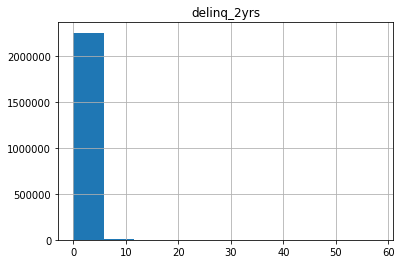

In [315]:

accepted_raw.hist(column="delinq_2yrs")

In [414]:
df_processed=data_processing(sample,one_hot_encoder=False, Label_encoder=False)

C:\Users\Laptop2\Anaconda3\lib\site-packages\ipykernel_launcher.py:255: RuntimeWarning: divide by zero encountered in log


In [416]:
df_processed.sample(600)

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,Class_charged off_default,cr_line_months,sec_app_cr_history,fico_mean
1687451,23000.0,60,13.49,4,23,8,RENT,50000.00,Source Verified,Fully Paid,debt_consolidation,GA,22.14,-inf,Individual,0.0,0.00,None,0.0,0.0,60616.0,0.0,10.0,0.0,0.0,55.0,42671.0,64.0,1.0,2.0,7513.0,61.0,33600.0,1.0,0.0,2.0,2.0,3566.0,11796.0,59.9,122.0,112.0,11.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,5.0,6.0,5.0,9.0,13.0,7.0,11.0,6.0,17.0,0.0,0.0,0.0,1.0,100.0,20.0,0.0,0.0,99933.0,60616.0,29400.0,66333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,442.982402,722.0
609664,15000.0,36,15.05,4,21,5,MORTGAGE,78000.00,Not Verified,Fully Paid,other,CO,17.15,-inf,Individual,0.0,0.00,None,0.0,0.0,221470.0,2.0,2.0,1.0,2.0,5.0,14056.0,77.0,3.0,3.0,4250.0,74.0,23900.0,2.0,3.0,6.0,5.0,22147.0,1543.0,83.2,153.0,352.0,4.0,4.0,2.0,4.0,0.0,2.0,0.0,0.0,3.0,6.0,3.0,6.0,6.0,7.0,14.0,6.0,10.0,0.0,0.0,0.0,4.0,100.0,66.7,1.0,0.0,238628.0,31310.0,9200.0,18228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,217.959301,667.0
658115,9000.0,36,13.99,4,22,0,RENT,35000.00,Verified,Fully Paid,debt_consolidation,MI,12.11,-inf,Individual,0.0,0.00,None,0.0,0.0,10416.0,0.0,1.0,0.0,1.0,24.0,1563.0,52.0,1.0,3.0,4052.0,43.0,21500.0,0.0,7.0,2.0,4.0,1302.0,324.0,94.8,131.0,307.0,12.0,12.0,1.0,18.0,0.0,3.0,0.0,0.0,2.0,3.0,2.0,5.0,3.0,8.0,16.0,3.0,8.0,0.0,0.0,0.0,1.0,100.0,100.0,1.0,0.0,24500.0,10416.0,6200.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,249.992813,672.0
1043151,12000.0,36,6.97,6,32,4,MORTGAGE,76000.00,Not Verified,Fully Paid,home_improvement,MN,18.96,-inf,Individual,0.0,0.00,None,0.0,0.0,221618.0,1.0,7.0,1.0,2.0,12.0,37981.0,71.0,1.0,4.0,2.0,56.0,14600.0,2.0,2.0,6.0,7.0,20147.0,10998.0,0.0,136.0,246.0,6.0,6.0,2.0,35.0,0.0,6.0,0.0,0.0,1.0,1.0,1.0,7.0,20.0,3.0,21.0,1.0,11.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,253340.0,37983.0,11000.0,53744.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,306.963182,742.0
1373897,14000.0,36,16.91,4,20,2,RENT,52500.00,Source Verified,Current,debt_consolidation,NE,25.42,-inf,Individual,0.0,0.00,None,0.0,0.0,57863.0,1.0,4.0,0.0,1.0,18.0,42365.0,83.0,3.0,3.0,7088.0,80.0,21500.0,2.0,2.0,2.0,4.0,4822.0,818.0,94.5,123.0,113.0,4.0,4.0,0.0,10.0,0.0,4.0,0.0,0.0,5.0,8.0,5.0,6.0,10.0,8.0,10.0,8.0,12.0,0.0,0.0,0.0,3.0,100.0,80.0,0.0,0.0,72464.0,57863.0,14800.0,50964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,464.009528,687.0
1626164,15000.0,36,10.99,5,27,5,MORTGAGE,59700.00,Source Verified,Fully Paid,debt_consolidation,OH,15.28,-inf,Individual,0.0,0.00,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [406]:

# The predicted column is "loan_status" , split the data into training and test sets.
x_m = df_processed.drop(['loan_status'], axis=1)
y_m = df_processed.loc[:,'loan_status']
X_train, X_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.2, random_state=0)

KeyError: 'loan_status '

In [363]:
df_processed.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,cr_line_months,sec_app_cr_history,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Joint App,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,fico_mean
2006592,4400.0,36,25.29,2,10,1,80000.0,0,9.15,-inf,3.0,204.0,4.6,13.0,0.0,0.0,0.0,0.0,0.0,707.0,25734.0,1.0,1.0,1.0,3.0,12.0,25530.0,88.0,4.0,5.0,55.0,77.0,4400.0,3.0,0.0,4.0,8.0,2859.0,1741.0,3.3,39.0,30.0,1.0,1.0,0.0,10.0,0.0,1.0,0.0,0.0,2.0,4.0,3.0,3.0,5.0,8.0,8.0,4.0,9.0,0.0,0.0,0.0,5.0,100.0,0.0,3.0,0.0,33302.0,25734.0,1800.0,28902.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,518.975749,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,692.0
348038,19050.0,60,22.99,1,9,10,56056.0,2,20.62,-inf,0.0,20166.0,67.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,23194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30100.0,0.0,0.0,0.0,5.0,1546.0,4414.0,67.1,318.0,126.0,5.0,5.0,0.0,7.0,0.0,5.0,0.0,0.0,5.0,9.0,6.0,13.0,5.0,16.0,26.0,9.0,17.0,0.0,0.0,0.0,4.0,100.0,66.7,0.0,0.0,38367.0,23194.0,13400.0,8267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,224.004600,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,702.0
1759297,18000.0,60,16.99,3,19,6,137000.0,2,19.34,-inf,1.0,39724.0,88.3,18.0,0.0,0.0,0.0,0.0,0.0,0.0,435508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45000.0,0.0,0.0,0.0,2.0,54439.0,5276.0,88.3,125.0,213.0,21.0,21.0,3.0,21.0,27.0,4.0,27.0,0.0,7.0,7.0,7.0,8.0,6.0,7.0,9.0,7.0,9.0,0.0,0.0,0.0,0.0,88.9,71.4,0.0,1.0,453343.0,39724.0,45000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,313.96127

In [231]:
df_processed.isnull().sum().sum()

0

array([ 1,  0,  2, 16,  5,  3,  7,  4,  6,  8, 32, 11, 10], dtype=int64)

 <p><a name="ml"></a></p>
 
 # Machine Learning
 
- Unsupervised Machine Learning  
    - <a href="#kmeans">K Means</a><br> 
    
- Supervised Machine Learning      
    - <a href="#logistic">Logistic Regression</a><br>
    - <a href="#rf">Random Forest</a><br>
    - <a href="#svm">SVM</a><br>
    - <a href="#xgboost">XGBoost</a><br>
    - <a href="#naive">Naive Bayes Classifier</a><br>
    - <a href="#neighbor">Nearest Neighbor</a><br>
</a><br>
- Working on
    Neural Networks
</a><br>
- Links: 
    - https://github.com/perryrjohnson/Walk-Score/blob/master/feature%20engineering.ipynb
    - https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [391]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score


from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score, roc_curve
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

 <p><a name="kmeans"></a></p>
 
 ### K Means
 
 Link: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

In [39]:
from sklearn.cluster import KMeans

In [359]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [397]:
coln=X_train.columns.to_list()

logreg = LogisticRegression()
for i in range (1,len(X_train)):
#     try:
    print (coln[i])
    logreg.fit(X_train[X_train.columns[:i]], y_train.values.ravel())
    y_pred = logreg.predict(X_test[X_test.columns[:i]])
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[X_test.columns[:i]], y_test)))
    y_pred = logreg.predict(X_test[X_test.columns[:i]])
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[X_test.columns[:i]], y_test)))


term
Accuracy of logistic regression classifier on test set: 0.52
Accuracy of logistic regression classifier on test set: 0.52
int_rate
Accuracy of logistic regression classifier on test set: 0.50
Accuracy of logistic regression classifier on test set: 0.50
grade
Accuracy of logistic regression classifier on test set: 0.49
Accuracy of logistic regression classifier on test set: 0.49
sub_grade
Accuracy of logistic regression classifier on test set: 0.48
Accuracy of logistic regression classifier on test set: 0.48
emp_length
Accuracy of logistic regression classifier on test set: 0.49
Accuracy of logistic regression classifier on test set: 0.49
annual_inc
Accuracy of logistic regression classifier on test set: 0.49
Accuracy of logistic regression classifier on test set: 0.49
dti
Accuracy of logistic regression classifier on test set: 0.49
Accuracy of logistic regression classifier on test set: 0.49
delinq_2yrs
Accuracy of logistic regression classifier on test set: 0.47
Accuracy of logis

C:\Users\Laptop2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laptop2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laptop2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laptop2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Laptop2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [265]:
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train.values.ravel())
# y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, logreg.predict(X_test))

print(confusion_matrix)

NameError: name 'logreg' is not defined

In [100]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 <p><a name="decision"></a></p>
 
 ### Decision Tree 

In [96]:
# from sklearn.tree import DecisionTreeClassifier

# X_train=pd.DataFrame(X_train).fillna(0)
# y_train=pd.DataFrame(y_train).fillna(0)

# X_test=pd.DataFrame(X_test).fillna(0)

# # Make a decision tree and train
# decisionTree = DecisionTreeClassifier(random_state=42)
# decisionTree.fit(X_train, y_train)

# print(f'Model Accuracy: {decisionTree.score(X_train, y_train)}')

In [97]:
# y_pred = decisionTree.predict(X_test)
# # print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

 <p><a name="rf"></a></p>
 
 ### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 1000 trees
model = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)

# Fit on training data
model.fit(X_train, y_train)


C:\Users\Laptop2\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [60]:
y_pred = model.predict(X_test)
# print(f'Model Accuracy: {model.score(X_train, y_train)}')
# print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').